In [1]:
import pandas as pd

data = pd.read_csv("dataset/reviews.csv")
data.head()


FileNotFoundError: [Errno 2] No such file or directory: 'dataset/reviews.csv'

In [2]:
import os
os.getcwd()



'C:\\Users\\manas\\OneDrive\\Desktop\\Task-4-Sentiment-Analysis'

In [3]:
import pandas as pd

data = pd.read_csv("dataset/reviews.csv")
data.head()


,name,image,link,no_of_ratings,discount_price,actual_price,rating,review_text,brand,cleaned_review_text,sentiment
0,OnePlus Nord CE 2 Lite 5G Blue Tide 6GB RAM 12...,https://m.media-amazon.com/images/I/71AvQd3Vzq...,https://www.amazon.in/OnePlus-Nord-Lite-128GB-...,113956.0,18999.0,19999.0,1.0,Very bad experience with this device xr phone....,OnePlus,bad experience device xr phone back camera fou...,Negative
1,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,https://m.media-amazon.com/images/I/51UhwaQXCp...,https://www.amazon.in/Oneplus-Bluetooth-Wirele...,90304.0,1999.0,2299.0,5.0,Amazing phone with amazing camera coming from ...,OnePlus,amazing phone amazing camera coming device plu...,Positive
2,Samsung Galaxy M33 5G Mystique Green 6GB 128GB...,https://m.media-amazon.com/images/I/81I3w4J6yj...,https://www.amazon.in/Samsung-Mystique-Storage...,24863.0,15999.0,24999.0,1.0,So I got the device XR just today. The product...,Samsung,got device xr today product look amazing unfor...,Negative
3,OnePlus Nord CE 2 Lite 5G Black Dusk 6GB RAM 1...,https://m.media-amazon.com/images/I/71V--WZVUI...,https://www.amazon.in/OnePlus-Nord-Black-128GB...,113956.0,18999.0,19999.0,5.0,I've been an android user all my life until I ...,OnePlus,ive android user life decided try device xr io...,Positive
4,Redmi 10 Power Sporty Orange 8GB RAM 128GB Sto...,https://m.media-amazon.com/images/I/81OZGH4fZi...,https://www.amazon.in/Redmi-Power-Sporty-Orang...,625.0,10999.0,18999.0,1.0,I was delivered a phone that did not work imme...,Redmi,delivered phone work immediately removing box ...,Negative


In [4]:
data.columns


Index(['name', 'image', 'link', 'no_of_ratings', 'discount_price',
       'actual_price', 'rating', 'review_text', 'brand', 'cleaned_review_text',
       'sentiment'],
      dtype='object')

In [5]:
data = data[['cleaned_review_text', 'sentiment']]
data.head()


,cleaned_review_text,sentiment
0,bad experience device xr phone back camera fou...,Negative
1,amazing phone amazing camera coming device plu...,Positive
2,got device xr today product look amazing unfor...,Negative
3,ive android user life decided try device xr io...,Positive
4,delivered phone work immediately removing box ...,Negative


In [6]:
data['sentiment'].value_counts()


sentiment
Positive    4448
Negative     406
Name: count, dtype: int64

In [7]:
data.dropna(inplace=True)


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_review_text'])
y = data['sentiment']


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [11]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9254658385093167
              precision    recall  f1-score   support

    Negative       0.90      0.11      0.20        80
    Positive       0.93      1.00      0.96       886

    accuracy                           0.93       966
   macro avg       0.91      0.56      0.58       966
weighted avg       0.92      0.93      0.90       966



In [12]:
sample = ["This product quality is very good and value for money"]
sample_vec = vectorizer.transform(sample)
print("Predicted Sentiment:", model.predict(sample_vec)[0])


Predicted Sentiment: Positive


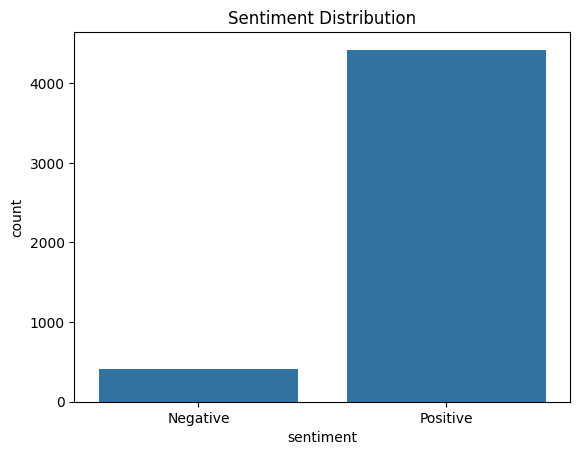

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=data['sentiment'])
plt.title("Sentiment Distribution")
plt.show()


In [14]:
plt.savefig("sentiment_analysis/sentiment_distribution.png")


<Figure size 640x480 with 0 Axes>

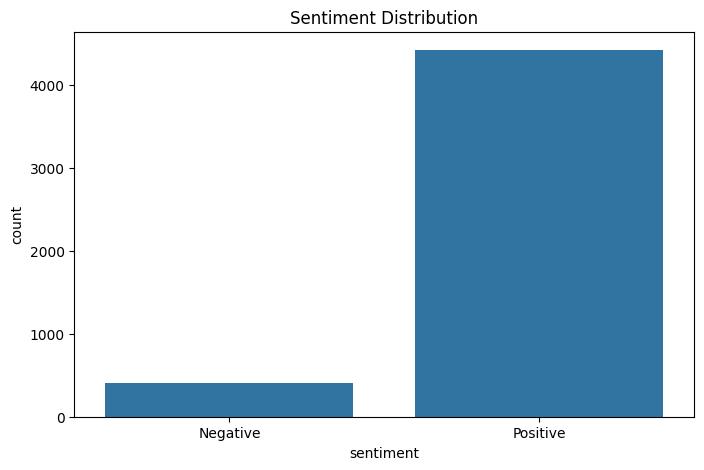

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x=data['sentiment'])
plt.title("Sentiment Distribution")
plt.savefig("sentiment_analysis/sentiment_distribution.png")
plt.show()
